My project will explore the topic of house construction prices in the United States from 1973 to present day.
I will use this project to project when the next best time to build a new house might be, and approximate
how much money that house would cost on average to build in the United States. This project may also
project when the next economic downturn will be, depending on how the model works out. This project
will be interesting because it will likely clearly demonstrate the recessions during the terms of Presidents
Nixon, Ford, Carter, Reagan, Bush 41, Bush 43, Obama, and most recently the COVID-19 recession during
President Trump and President Biden’s terms, and the effects of those recessions on the housing market. I
will obtain this data from the United State Census Bureau, in a monthly form using their Excel spreadsheet
export function. This data can be obtained publicly at https://www.census.gov/construction/cpi/.

I will compare this data for house construction costs to material costs such as lumber, which I have obtained from https://www.macrotrends.net/futures/lumber in a spreadsheet. The spreadsheet didn't come out perfectly how I would have liked, so I averaged it out by month. Both CSVs will be available on my GitHub page, located at www.GitHub.com/JacobPeterson7.

Comparing the data of house construction prices to material costs will be a good way to predict the price to build houses in the future, as well as predicting the price of materials in the future. Later on in my project, I will compare house construction prices to T Bills to compare the price of building a home to the rate of inflation, or the rate at which the price of the dollar changes, which at the time of writing this, it is likely to be high from what I have heard in the news and other sources. 

In [1]:
import pandas as pd
project_data=pd.read_csv('project_data.csv', index_col = 'Date')
print(project_data)

        Real Prices  Nominal Prices
Date                               
Jan-73         18.9            18.3
Feb-73         18.9            18.3
Mar-73         19.1            18.3
Apr-73         19.3            18.7
May-73         19.5            18.7
...             ...             ...
21-Mar        148.7           149.8
21-Apr        150.5           151.4
21-May        152.6           153.8
21-Jun        153.9           155.2
21-Jul        156.5           157.9

[583 rows x 2 columns]


In [2]:
x = 2021 - 1973
OctMinJan = 10 - 1
MonthsInYear = 12

Current_Month = (x * MonthsInYear) + OctMinJan

print(Current_Month)

585


October 2021 would be month 585 if we had data for it, but unfortunately we do **not** have the data for October of 2021. However, this gives us a good estimate of what the price is to build a house today. We have the data for lumber and house construction prices from January of 1973 to July of 2021. This means there are 582 months of usable data to work with. 

In [3]:
lumber_data=pd.read_csv('lumber_prices2.csv',index_col='Date')
print(lumber_data)

          Real Price of Lumber
Date                          
1/1/1973            145.371429
2/1/1973            156.710526
3/1/1973            164.972727
4/1/1973            157.657500
5/1/1973            134.140909
...                        ...
3/1/2021            898.956522
4/1/2021           1240.504762
5/1/2021           1439.070000
6/1/2021           1016.010909
7/1/2021            658.123809

[583 rows x 1 columns]


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<ipython-input-5-2ded3d7d8bc0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


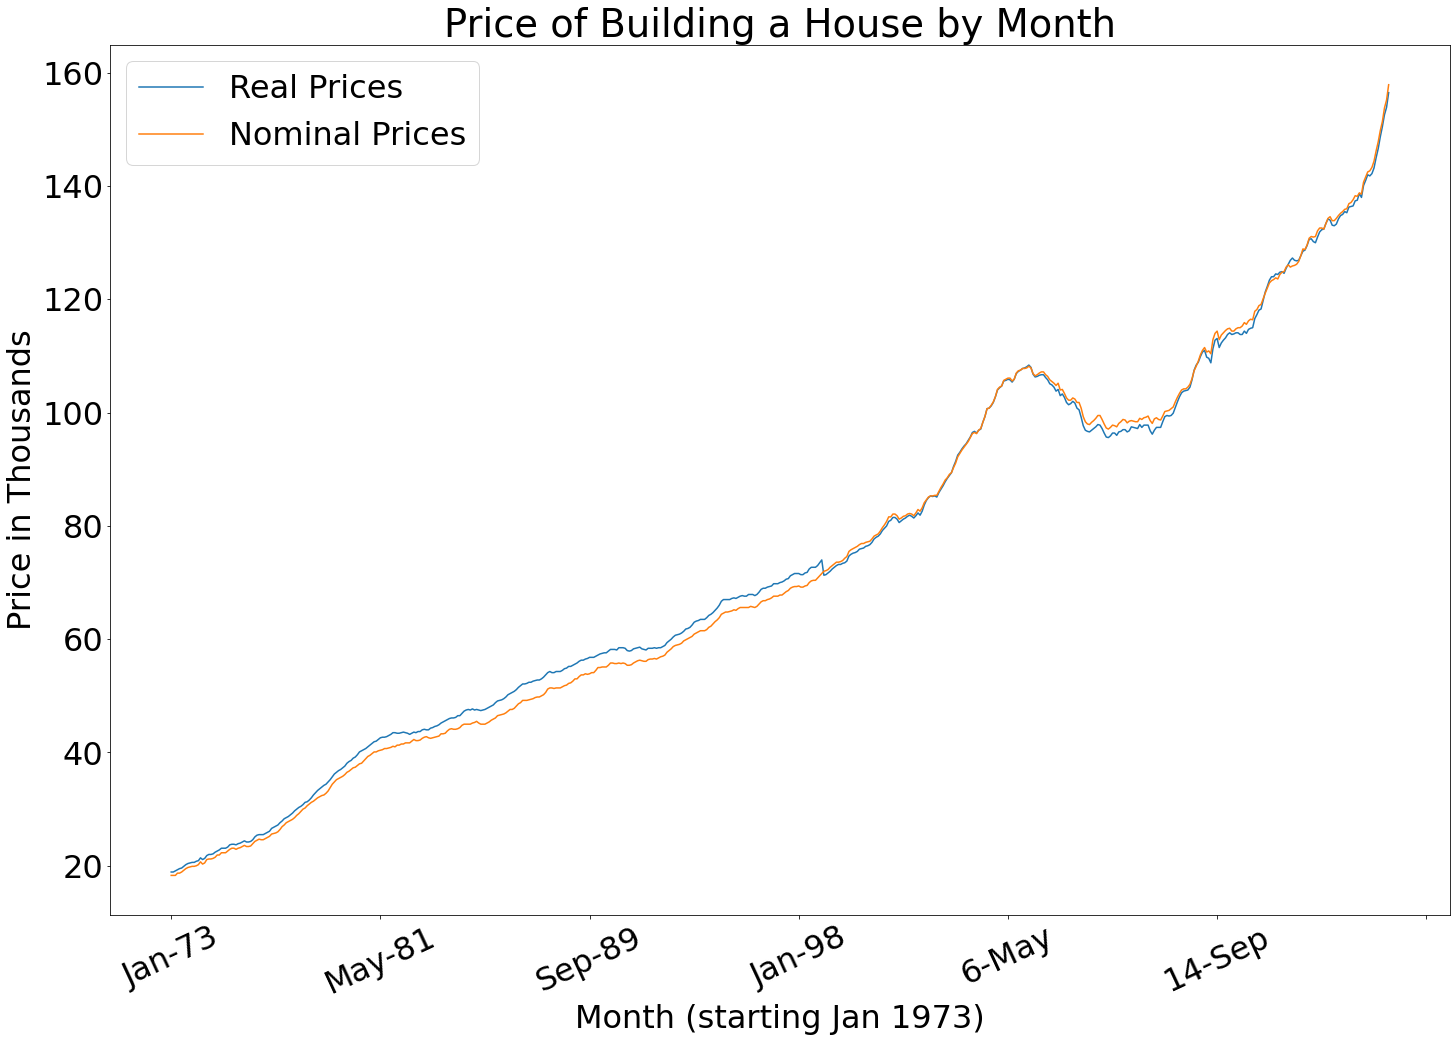

In [5]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
project_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1973)')
plt.xticks(rotation = 25)
plt.ylabel('Price in Thousands')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Price of Building a House by Month")
plt.show()
plt.close()

As we can see in the graph above, Real Prices _slightly_ edge out nominal prices in the beginning. This holds true until approximately month 415, when nominal prices finally rise above Real Prices. After (approximately) month 415, Real Prices and Nominal Prices are very close to the same the same, with minor variations each month and constantly switching in position regarding which price is higher versus which price is lower. 

<ipython-input-6-a1a377ecec31>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


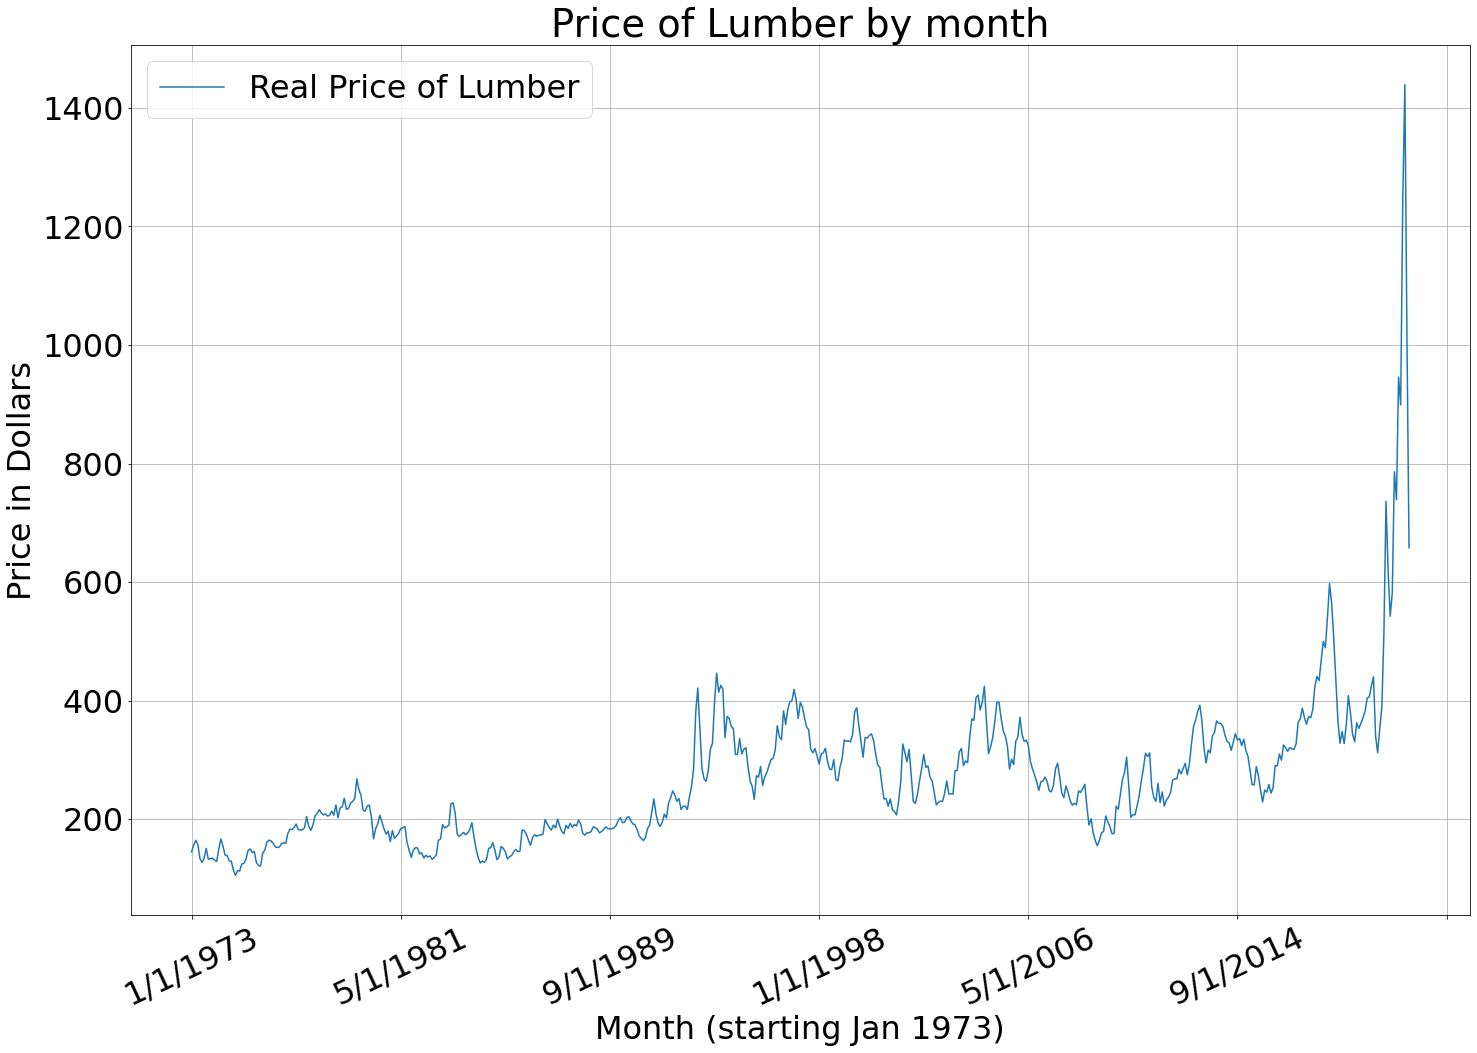

In [6]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
lumber_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1973)')
plt.xticks(rotation = 25)
plt.ylabel('Price in Dollars')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])  
plt.grid(True)

plt.title("Price of Lumber by month")
plt.show()
plt.close()

As we can see in this graph above, lumber prices have increased and decreased sporatically throughout the past forty eight years. According to the graph, the prices hovered around $150 to $400 for most of the time that is graphed. However, in about 2018, prices rose sharply to $600, then came back down. Then, at approximately month 570, the price of lumber skyrocketed to over $1400. Right now, they are decreasing sharply after a very high increase at approximately month 570. This means the price will likely stabilize soon.

Because we can also see that lumber prices have a **sharp** dropoff at the very end of the line that represents them, meaning the price to build a house will very likey go down simply due to the huge drop in lumber prices.

Now we will be plotting the change in prices of building a house and lumber by percent per month. This will give us an idea of how the prices of constructing a house and of purchasing lumber have been changing constantly among the past forty eight years. This graph will show us this on a monthly basis.

In [7]:
lumber_price_change_data = lumber_data.pct_change(12) * 100 

In [8]:
housing_price_change_data = project_data.pct_change(12) * 100

<ipython-input-9-b401a6f07178>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


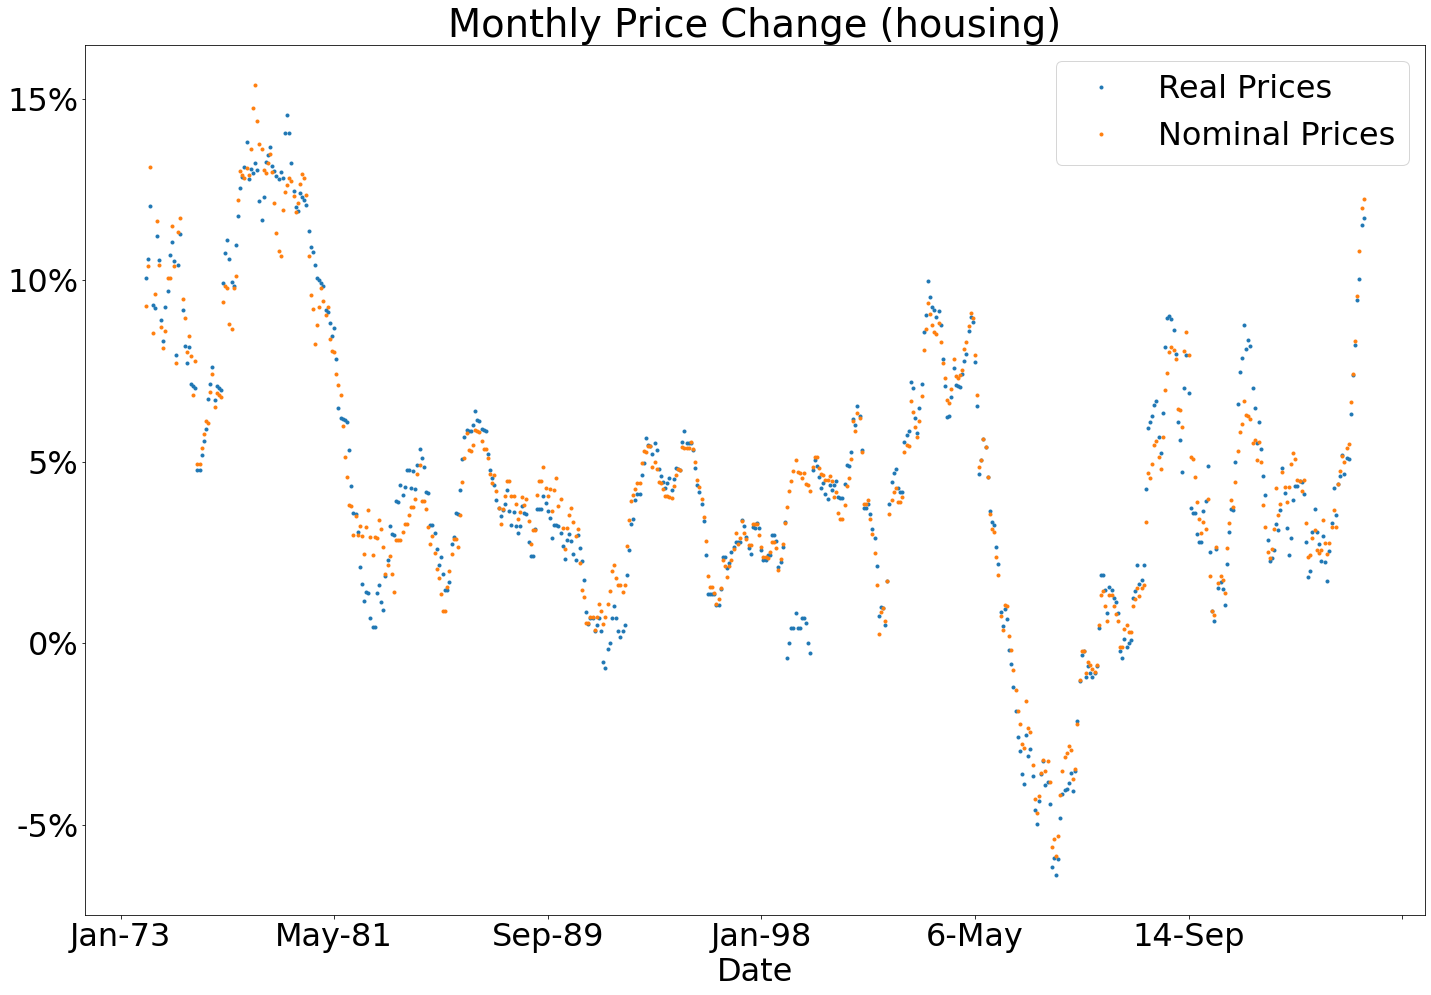

In [9]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in housing_price_change_data:
    housing_price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (housing)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We are able to visualize in this graph the percent change over time of the real and nominal prices for the construction of a home. The visualization tells us that the change in prices varies from month to month, which is expected. However, there are sometimes where the change is close to being zero percent. However, the price to construct a home usually increases in price, and only decreases every once in a while. We can also see on the graph that the price has been increasing steadily recently, increasing approximately 1.5% to 2% every month.

<ipython-input-10-358d3915e1be>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


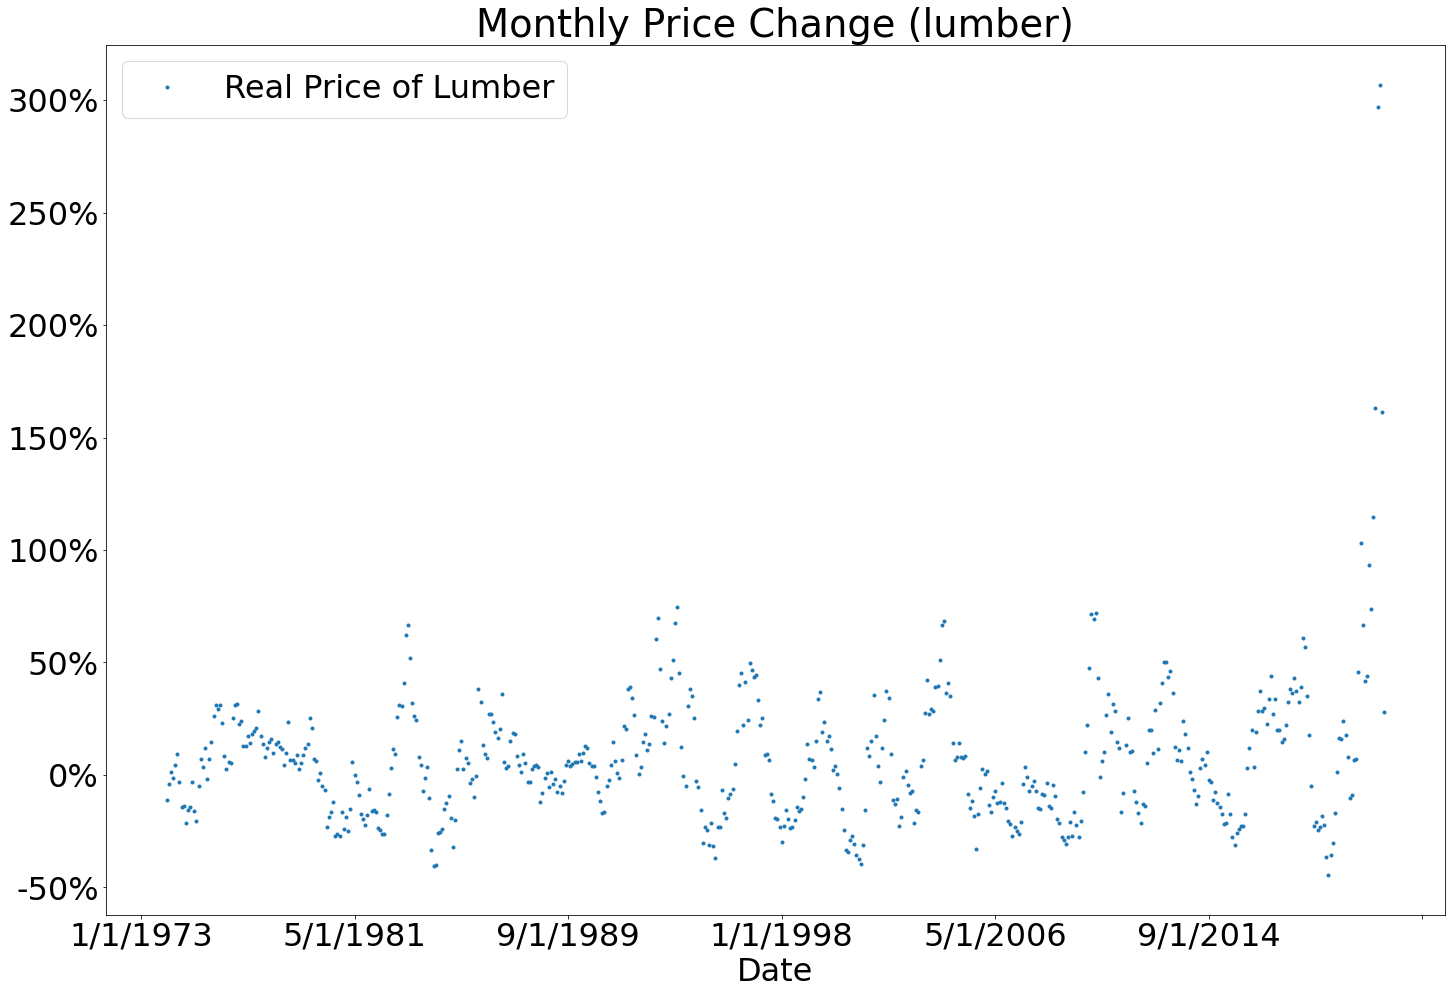

In [10]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in lumber_price_change_data:
    lumber_price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (lumber)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

With lumber, it's a different story as compared to the price of constructing a home. The price is fluctuates quite a bit, as the maximium positive change is over 40%, and the maximium negative change is over a 30% decrease. There are many months in which the price of lumber does not change very much, but there are also months in which there are changes in price of lumber of over a whopping forty percent increase. There are also months where there's over a thirty percent decrease in the price of lumber. This means that lumber is extremely volatile; the price fluctuates a lot from month to month. As of recently, which is depicted on the right side of the graph above, there have been higher fluctuations in price from month to month, as the highest changes both negative and positive have occurred in the past seven years. These are not present very often in the data leading up to present day, as the highest percent change was just around 30%, and it's clear this was an outlier. The huge price swings that we are seeing now are odd for the prices of lumber.

This project proposal is due October 3, 2021. The next time you look at this data, it will be in my rough draft assignment. My rough draft assignment is due November 24, 2021. The final time you look at my data will be when I am presenting it to the entire ECON 411 class. This will happen sometime during Final's week, week 16, which will span from December 6, 2021, to December 10, 2021.

After talking to Dr. Caton, he recommended a few things. Firstly, he recommended that I look at the Case Shiller Index, which compares the value of a home to the value of the S & P 500. He also recommended that, instead of calculating percent change by month, I should instead calculate it by year, which has been changed in my graphs above.

Now I will be importing the Case Shiller Index and graphing it.

In [11]:
CaseShillerIndex = pd.read_csv('CaseShillerIndex.csv', index_col = 'DATE')
print(CaseShillerIndex)

            CSUSHPINSA
DATE                  
1987-01-01      63.734
1987-02-01      64.134
1987-03-01      64.470
1987-04-01      64.975
1987-05-01      65.550
...                ...
2021-04-01     249.870
2021-05-01     255.526
2021-06-01     261.062
2021-07-01     265.464
2021-08-01     268.616

[416 rows x 1 columns]


Unfortunately for us, the Case Shiller Index I got from FRED only goes back to 1987, whereas our lumber and housing data goes back to 1973. While this will still be an accurate representation of housing prices, especially with regards to the price of the S & P 500, we won't be able to go as far back as we'd like.

<ipython-input-12-7f8ca5d86970>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


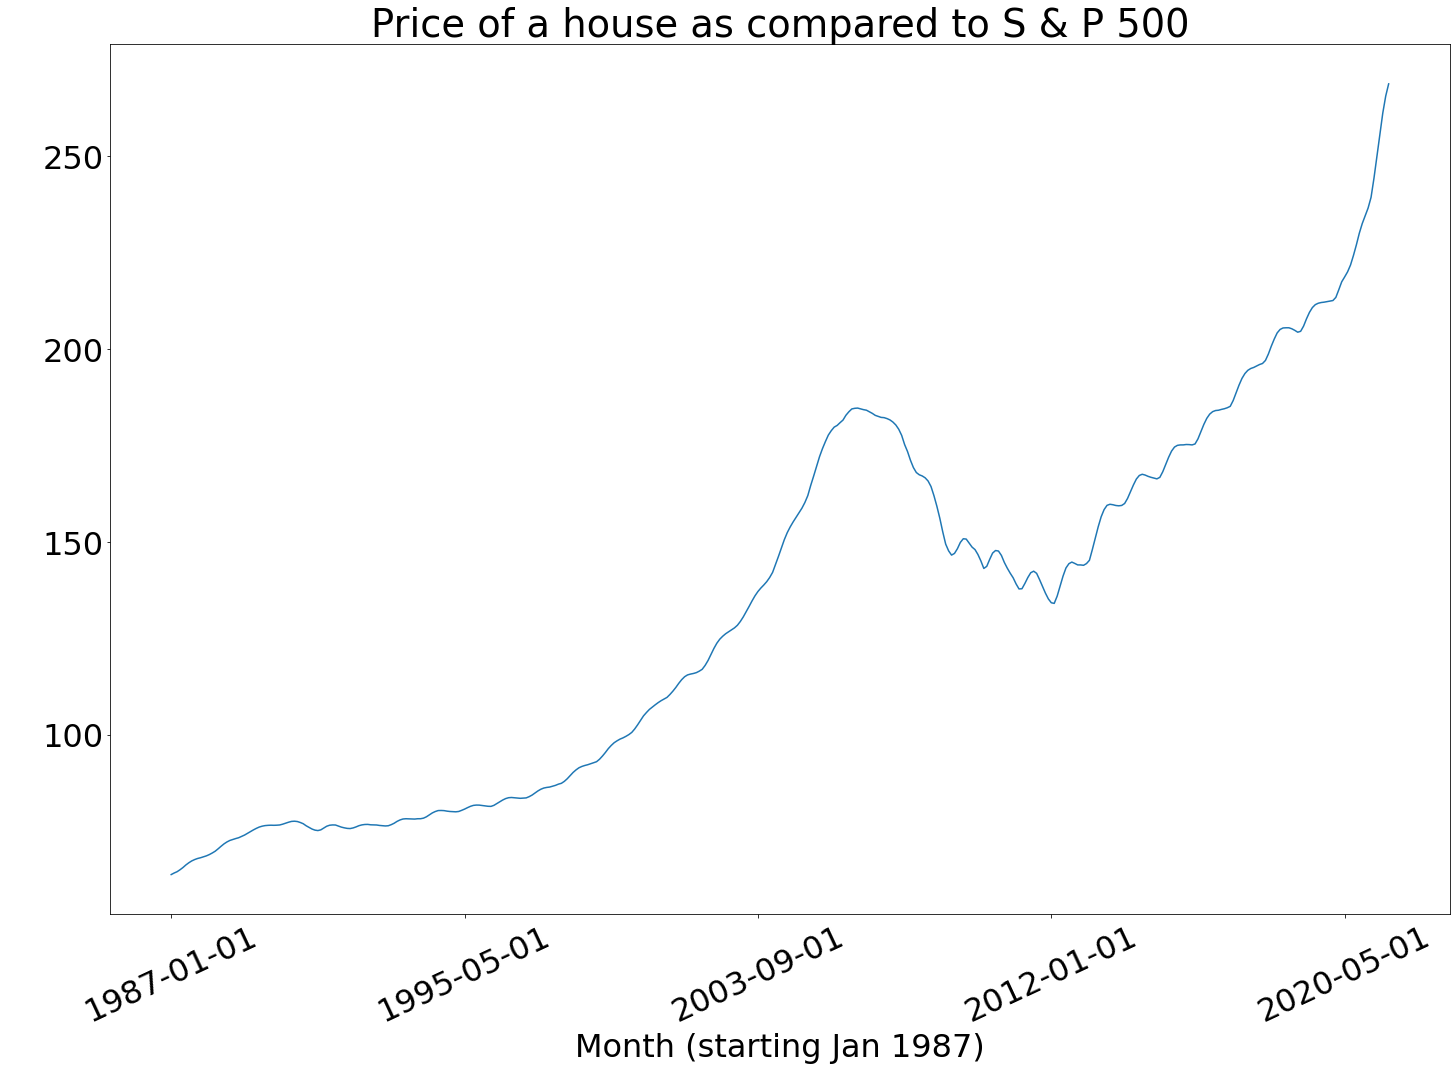

In [12]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
CaseShillerIndex.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1987)')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Price of a house as compared to S & P 500")
plt.show()
plt.close()

Like we did with the original data, we will calculate percent change with the Case Shiller index.

In [13]:
CaseShillerIndex_change_data = CaseShillerIndex.pct_change(12) * 100 

<ipython-input-14-b02adb1a9129>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


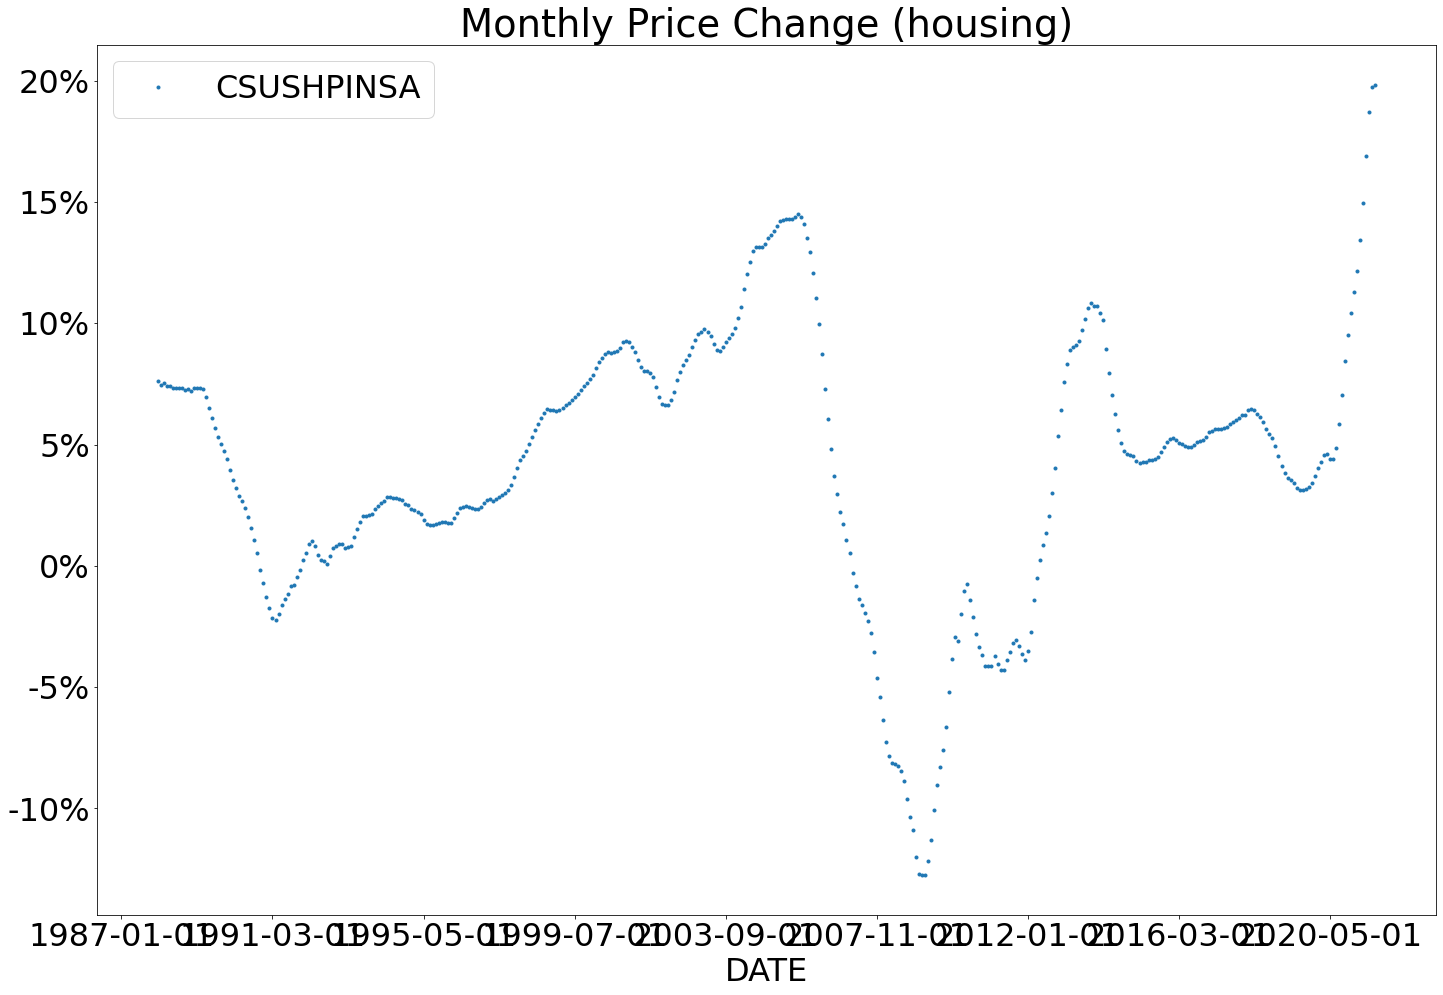

In [14]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in CaseShillerIndex_change_data:
    CaseShillerIndex_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (housing)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

According to an article written by Nikolaos Antonakakisa, Rangan Guptab, and Aviral K. Tiwar, 

"Stock prices are considered to be a leading indicator for economic activity of the U.S. economy (Stock and Watson, 2003; Rapach and Weber, 2004), and hence, determining what factors drive this market is of paramount importance. While stock prices are
primarily driven by financial variables (Valcarcel, 2012), the importance of macroeconomic variables cannot be ruled out either
(Goyal and Welch, 2008; Valcarcel, 2012; Rapach and Zhou, 2013). Inflation is undoubtedly one of the most important
macroeconomic variables believed to be related to stock prices, and in turn, also affected by it (Gupta and Inglesi-Lotz, 2012)."

This article can be read by opening "Inflation Article 2" in my GitHub.

This means that the Case Shiller Index is a good source of economic data when it comes to housing prices compared to the S & P 500, and in fact is considered to be a leading indicator. Because stock prices are the best indicator for economic activity of our economy, the Case Shiller Index should be considered to be very accurate when it comes to being an indicator of housing prices, S & P 500 prices, and economic wellbeing for the American People.

I will now also import Inflation into my project. I will graph its rate of change as well. 

In [15]:
Inflation = pd.read_csv('Inflation.csv', index_col = 'DATE')
print(Inflation)

            FPCPITOTLZGUSA
DATE                      
1960-01-01        1.457976
1961-01-01        1.070724
1962-01-01        1.198773
1963-01-01        1.239669
1964-01-01        1.278912
...                    ...
2016-01-01        1.261583
2017-01-01        2.130110
2018-01-01        2.442583
2019-01-01        1.812210
2020-01-01        1.233584

[61 rows x 1 columns]


<ipython-input-16-1064baf1eb70>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


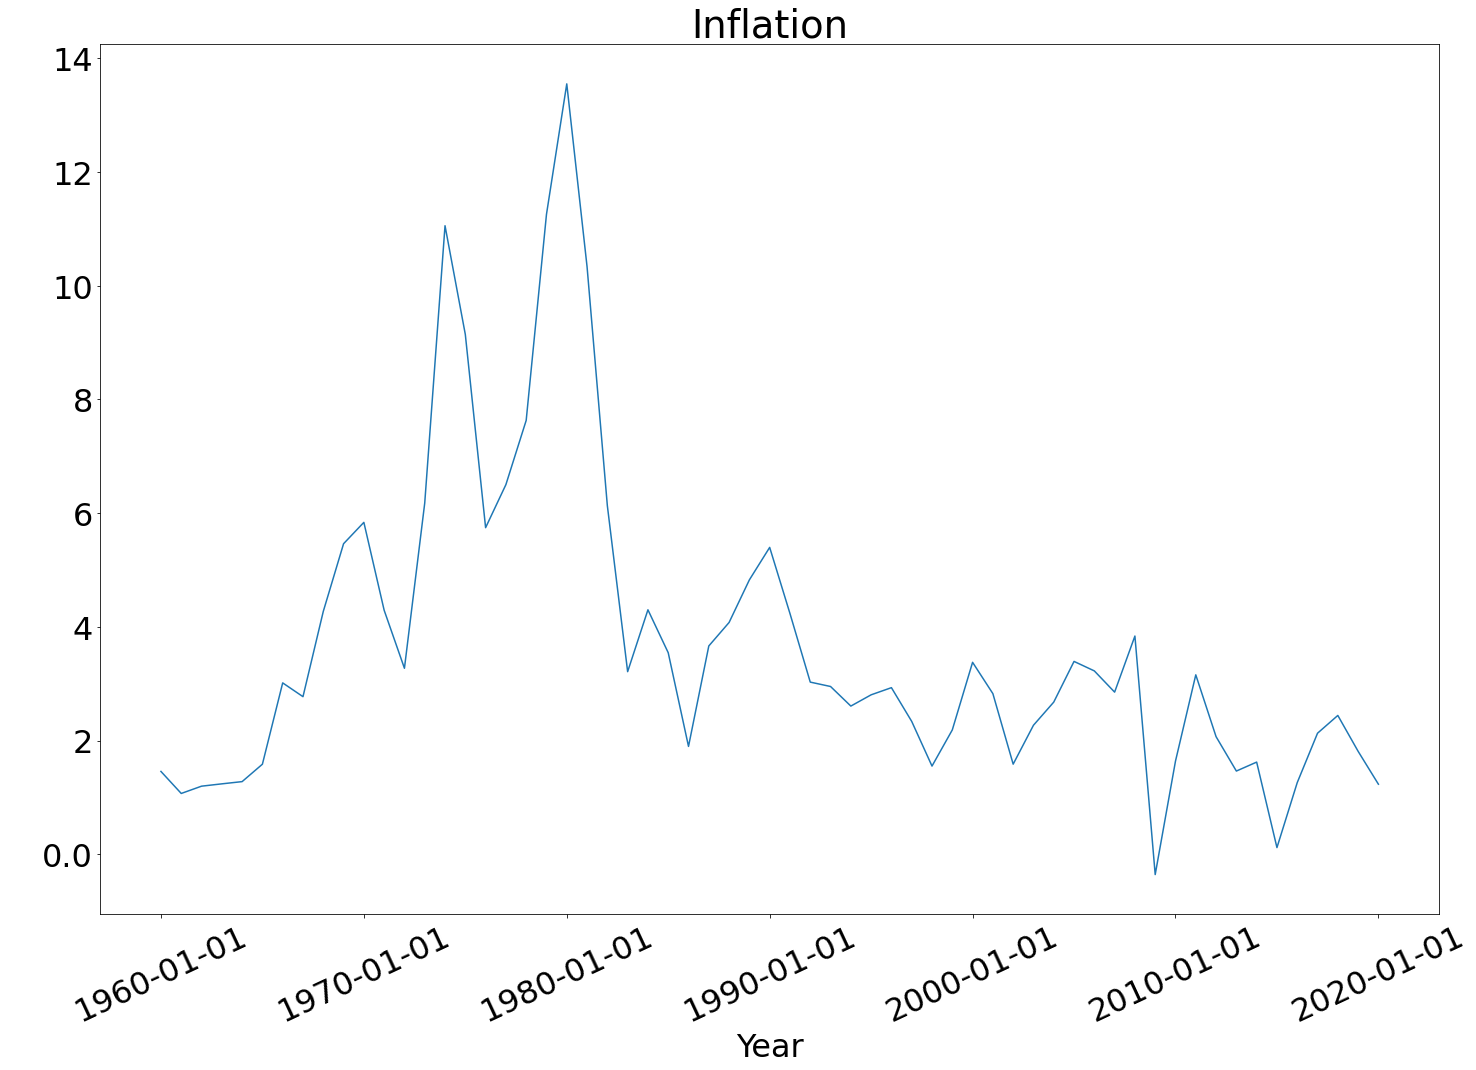

In [16]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
Inflation.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Inflation")
plt.show()
plt.close()

In [17]:
Inflation_change_data = Inflation.pct_change(12) * 100 

<ipython-input-18-6a91fda21914>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


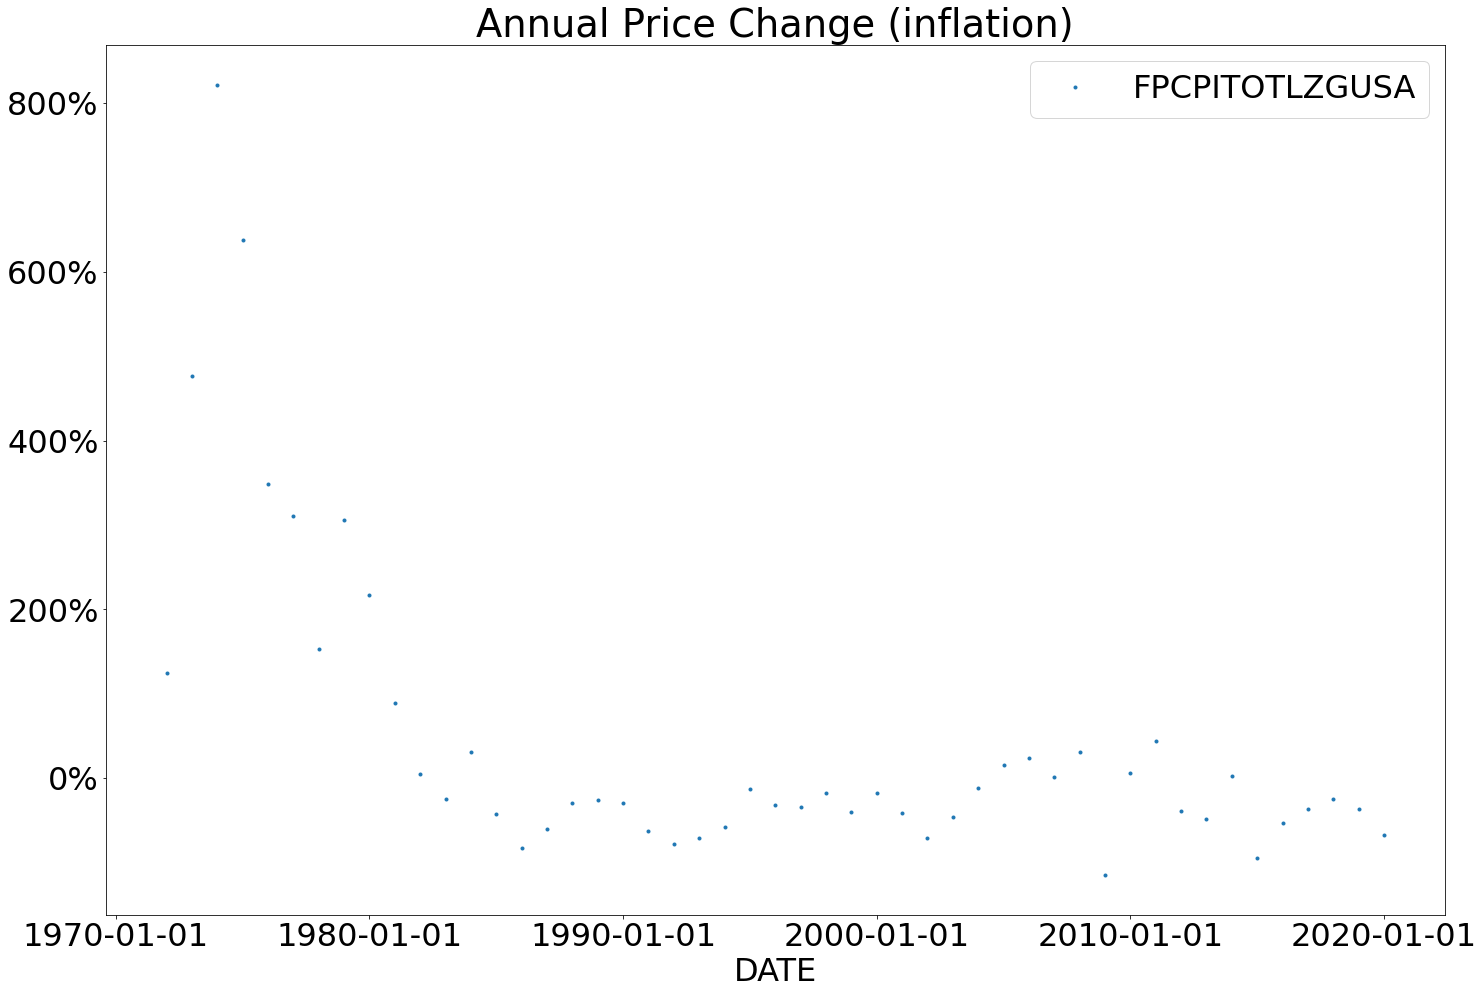

In [18]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in Inflation_change_data:
    Inflation_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Price Change (inflation)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

According to an article written by Francesco Bianchi, Leonardo Melosi, and Matthias Rottner, titled "Hitting the elusive inflation target" (which can be accessed here: https://www.sciencedirect.com/science/article/pii/S0304393221001148 or as "Inflation Article 1" in my GitHub), the inflation target is 2%.

"The discount factor β is set to 0.9993 to obtain an annualized real interest rate of 1.5%, which is broadly in line with the estimates of Laubach and Williams (2003) for this period. The Rotemberg parameter φ is set to 10 0 0 so that the slope of the New Keynesian Phillips curve is 0.01. The calibrated value for the demand elasticity implies a steady-state markup of 10 percent. The parameter governing the degree of external consumption habits is set to 0.5. The inverse Frisch elasticity is set in line with Chetty et al. (2011) . The parameter controlling the disutility of labor χ is set to normalize the steady-state level of employment to unity. We set the inflation target to 2%"

This makes me quite scared. While the inflation target is 2%, we are well over that in 2021. The last time I saw a news article on inflation, we were over 5.4% nationwide. This is all due to President Biden's wreckless spending, which will come back to hurt the housing market drastically. 

According to Housing Prices, Mortgage Interest Rates and the Rising Share of Capital Income in the United States by Gianni La Cava, published in July of 2016, which can be accessed by opening "Housing Prices La Cava" in my GitHub, 

"It is also possible to look at the prices and volumes of different types of housing in the United States.8 The national accounts indicate that, over the past 25 years, in nominal terms, the share of aggregate income going to owner-occupiers has risen by 1.9 percentage points and by 0.6 percentage points for landlords. In real terms, the share of aggregate income going to owner occupiers has been unchanged since 1980 and it has actually fallen by 0.2 percentage points for landlords. The different real trends for owner-occupied and tenant-occupied housing suggest that factors such as an increase in the rate of home ownership and in the average quality of owner-occupied housing have played some role in explaining the secular rise of housing in recent decades. These differences are reflected in the national accounts estimates of housing investment – the rate of investment for owner-occupied housing has been at least three times as high as that for tenant  occupied housing over the past quarter of a century."

After reading this, I understood why we saw the rate of change that we did in my previous graph relating to housing prices and the rate of change. This is because families are putting more money into their homes than ever before, causing prices to go up. Also, coupled with inflation, these factors have caused housing prices to jump to be extremely high. 

Now I want to switch gears and instead of looking at things from an inflation and monetary side, I want to look at housing prices as compared to materials again. I have found iron and steel prices on FRED for the past 90 years, and will now import them into my project and graph them. I will also graph the rate of change of steel and iron prices over the past 90 years.

In [19]:
IronSteelData = pd.read_csv('IronSteelData.csv', index_col = 'DATE')
print(IronSteelData)

            WPU101
DATE              
1926-01-01    11.4
1926-02-01    11.4
1926-03-01    11.4
1926-04-01    11.3
1926-05-01    11.3
...            ...
2021-06-01   354.9
2021-07-01   380.1
2021-08-01   391.2
2021-09-01   402.9
2021-10-01   418.0

[1150 rows x 1 columns]


<ipython-input-20-f75afc76ae1e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


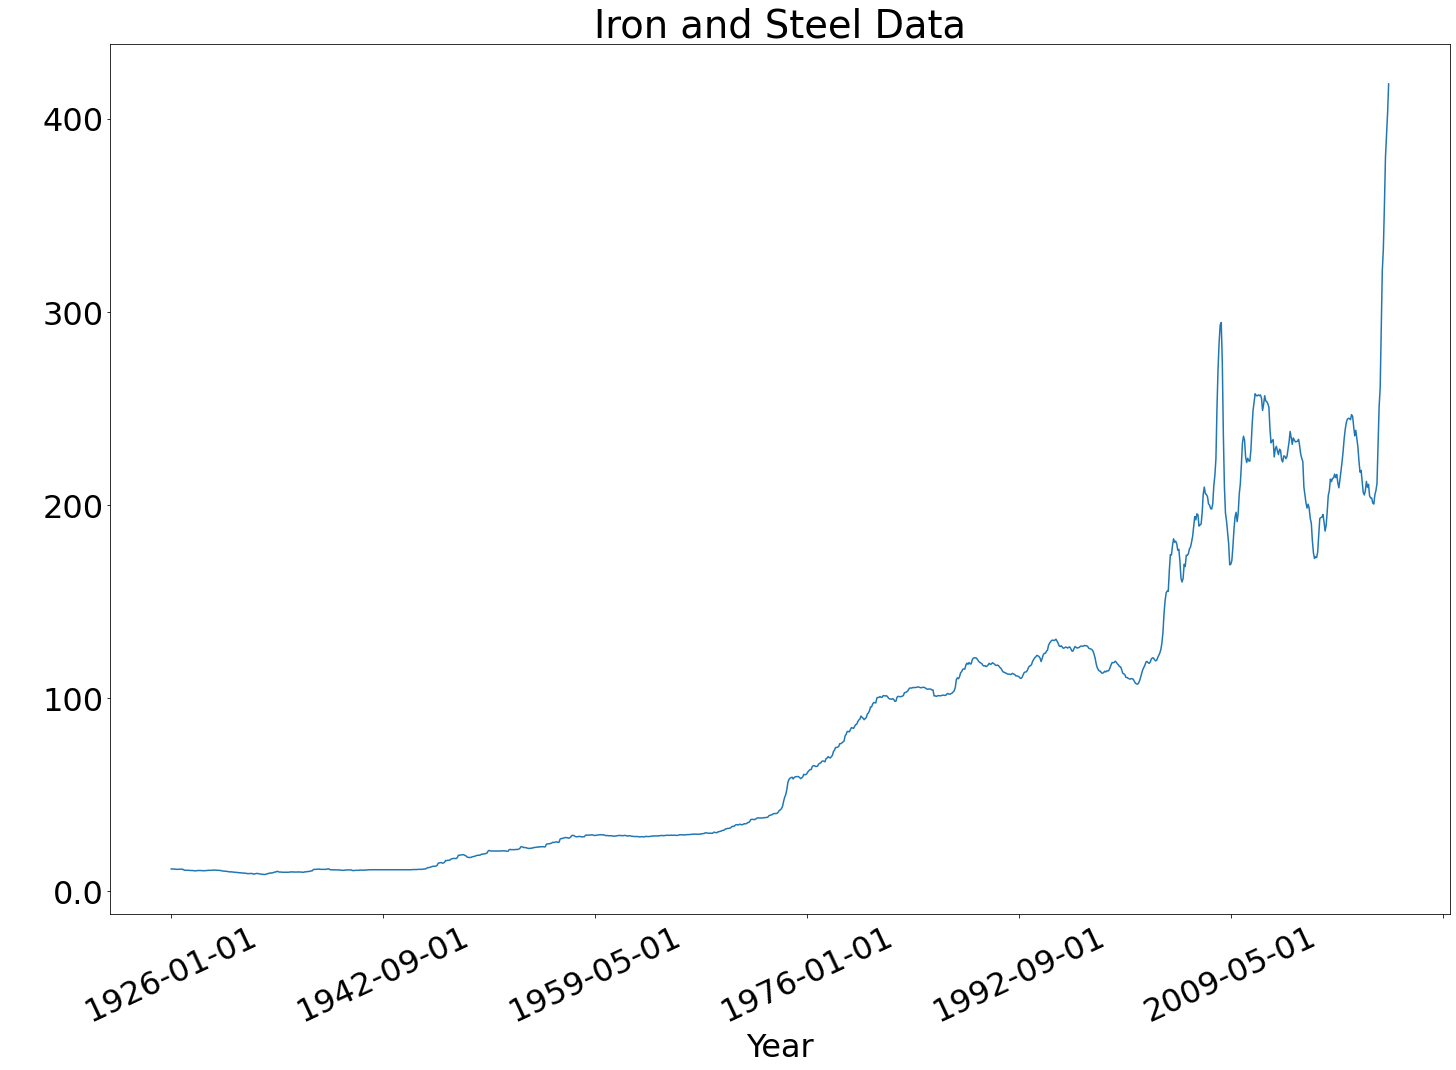

In [20]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
IronSteelData.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Iron and Steel Data")
plt.show()
plt.close()

In [21]:
IronSteel_change_data = IronSteelData.pct_change(12) * 100 

<ipython-input-22-3aadd06ba92d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


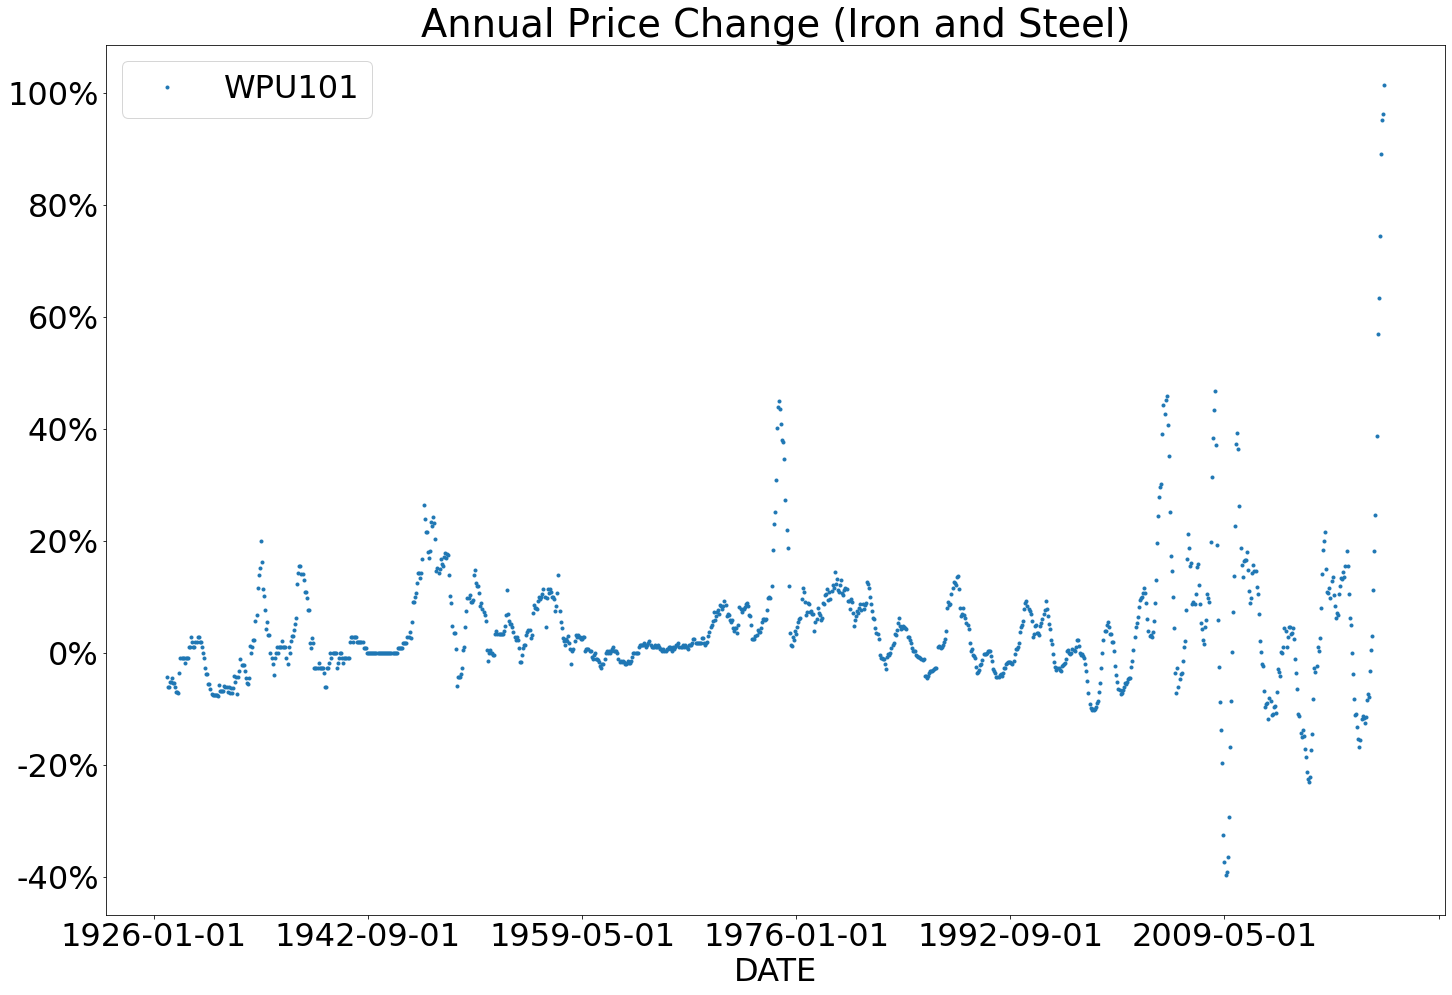

In [22]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in IronSteel_change_data:
    IronSteel_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Price Change (Iron and Steel)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We can see that, as of lately, steel and iron prices seem to only be going up, with as much as a 100% increase in price. Now we will look at other factors of building a house. One of these will be glass prices.

I found an article that explains this change. This article was "Detecting positive feedback in multivariate time series: The case of metal prices and US inflation" by Catherine Kyrtsoua and Walter C. Labys. You can read it by opening "Metal Prices and Inflation Kyrtsou" in my GitHub. A quote that stuck out to me in this article was this:

"The complex nature of commodity prices has been studied in the recent work of Kyrtsou et al.[6].Inadifferent framework, Westerhoff and Reitz[7]and He and Westerhoff[8]use heterogeneous agent-basedmodels to characterise commodity price fluctuations. In this paper, we are interested in detecting inherentcausality and feedbacks in the linkages between inflation and primary commodity prices with the use of thebivariate Mackey–Glass model, recently presented in Kyrtsou and Labys[9]. Quantifying and then qualifyingthe presence of feedback can help both practitioners and researchers to understand the mechanism of shocktransmission from the financial sector to macroeconomy and vice versa."

This was very interesting to me because it links inflation and commodity prices. While this makes intutitive sense, it really helps pull my entire project together.

In [23]:
GlassData = pd.read_csv('GlassData.csv', index_col = 'DATE')
print(GlassData)

            PCU3272113272111
DATE                        
1980-12-01             100.0
1981-01-01             100.7
1981-02-01             101.0
1981-03-01             101.7
1981-04-01             109.6
...                      ...
2021-06-01             122.9
2021-07-01             128.2
2021-08-01             128.4
2021-09-01             126.1
2021-10-01             128.4

[491 rows x 1 columns]


<ipython-input-24-a319d5ec3aff>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


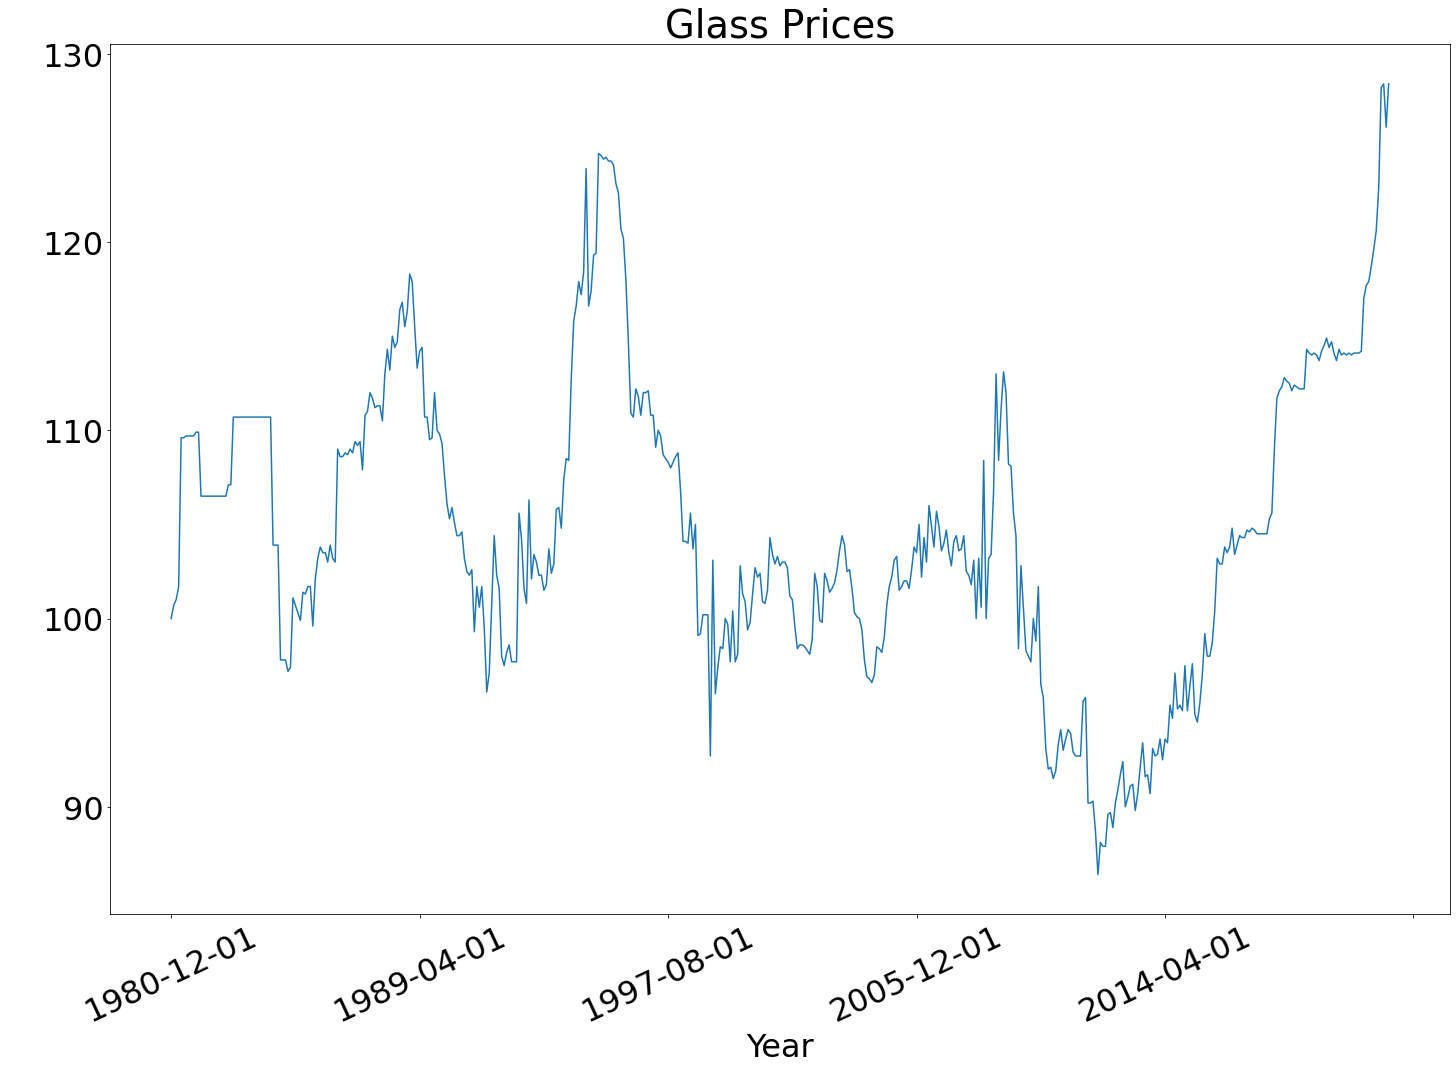

In [24]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
GlassData.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Glass Prices")
plt.show()
plt.close()

<ipython-input-25-18c4b829763b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


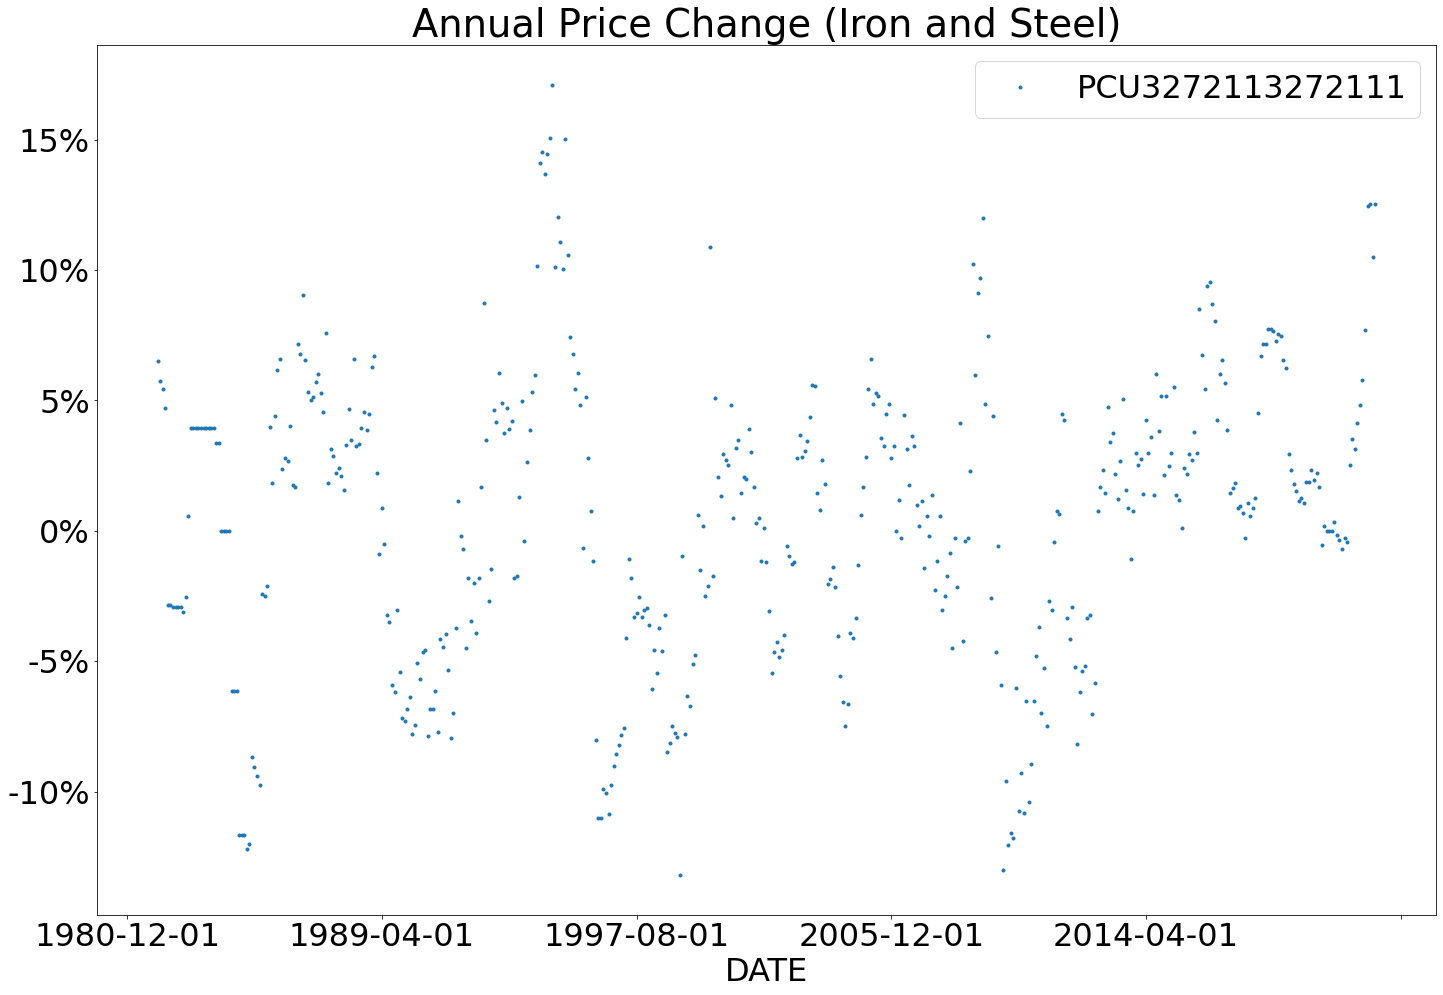

In [25]:
Glass_change_data = GlassData.pct_change(12) * 100 

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in Glass_change_data:
    Glass_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Price Change (Iron and Steel)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We can see that the distribution for glass prices is nowhere near our distribution for inflation, iron and steel prices, or even housing prices. It's very consistently in between a 10% and -10% change per year.